<a href="https://colab.research.google.com/github/Entro01/ML-starter/blob/main/makemore/makemore_bigram/makrmore_bigram_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
words = open('names.txt', 'r').read().splitlines()

In [86]:
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [87]:
print(min(len(x) for x in words))
print(max(len(x) for x in words))

2
15


In [88]:
#bigram - only dealing with two characters at a time, always looking at the previous characater to predict the next one.

b = {}
for x in words[:3]:
  x = ['<S>'] + list(x) + ['<E>']
  for i,j in zip(x, x[1:]):
    biagram = (i, j)
    b[biagram] = b.get(biagram, 0) + 1
print(b)

{('<S>', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '<E>'): 3, ('<S>', 'o'): 1, ('o', 'l'): 1, ('l', 'i'): 1, ('i', 'v'): 1, ('v', 'i'): 1, ('i', 'a'): 1, ('<S>', 'a'): 1, ('a', 'v'): 1, ('v', 'a'): 1}


In [106]:
sorted(b.items(), key = lambda k : -k[1])

[(('a', '<E>'), 3),
 (('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('i', 'a'), 1),
 (('<S>', 'a'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1)]

In [90]:
import torch

N = torch.zeros((27, 27), dtype = torch.int32)

In [91]:
chrs = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i,s in enumerate(chrs)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [92]:
for x in words:
  x = ['.'] + list(x) + ['.']
  for i,j in zip(x, x[1:]):
    ii = stoi[i]
    ji = stoi[j]
    N[ii, ji] += 1

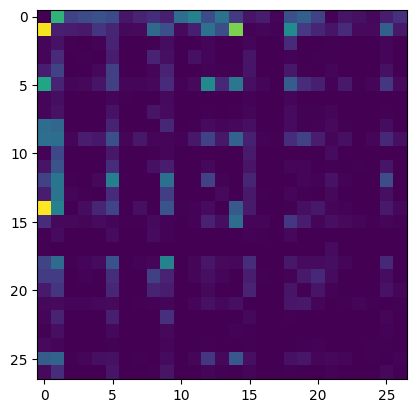

In [93]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [94]:
P = (N+1).float() # N + 1 to remove the 0 values so that the model doesnt produce an infinite nll for the baigrams that dont appear in the training set (model smoothing)
P = P / P.sum(1, keepdim = True)

In [95]:
P[0].sum()

tensor(1.)

In [96]:
# generating new names

g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [97]:
# evaluating the quality of the model
# our goal is to maximize the likelihood of the data wrt model parameters
# maximizing the likelihood = maximizing the log likelihood = minimizing the negative log likelihood = minimizing the average negative log likelihood

log_likelihood = 0.0
n = 0
for x in ["karajan"]:
#for x in words:
  x = ['.'] + list(x) + ['.']
  for i,j in zip(x, x[1:]):
    ii = stoi[i]
    ji = stoi[j]
    logprob = torch.log(P[ii, ji])
    log_likelihood += logprob
    n += 1
    print(f'{i}{j}: {logprob:.4f}')
print(f'log likelihood: {log_likelihood}')
nll = -log_likelihood
print(f'nll: {nll / n}')

.k: -2.3811
ka: -1.0735
ar: -2.3405
ra: -1.6863
aj: -5.2610
ja: -0.6860
an: -1.8302
n.: -0.9982
log likelihood: -16.256832122802734
nll: 2.032104015350342


In [98]:
# using gradient based optimization to tune the parameters of a neural network to minimize the loss function (nll)

In [99]:
# creating the training set (x,y)

xs, ys = [], []

for x in words[:1]:
  x = ['.'] + list(x) + ['.']
  for i,j in zip(x, x[1:]):
    ii = stoi[i]
    ji = stoi[j]
    xs.append(ii)
    ys.append(ji)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [115]:
xs

tensor([ 0,  5, 13, 13,  1])

In [100]:
# one hot encoding

import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [101]:
xenc.shape

torch.Size([5, 27])

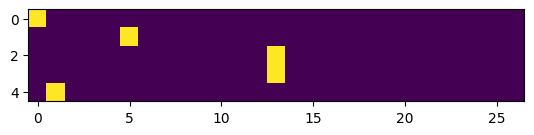

In [102]:
plt.imshow(xenc)

In [103]:
xenc.dtype

torch.float32

In [118]:
# creating the first neuron layer
# the individual rows of the W matrix represents the different classes in the input and the individual columns represent the weights of the individual neurons.

g = torch.Generator().manual_seed(2147483647)

W = torch.randn(27,27, generator = g) # creating 27 neurons

# this layer of neurons is a linear layer, it doesnt have a bias

logits = xenc @ W # log count

logits # output of the linear layer

# (5,27) . (27, 27) --> (5,27)
# this is the neurons activations on these  inputs

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [119]:
logits[2,15] # the firing rate of 15th neuron looking at the 2nd input

tensor(-0.8271)

In [121]:
# converting the logits into a probablity distribution
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for the next character (output of the softmax layer)
# these two lines together are called a softmax - it is the layer in a neural network that outputs a probability distribution (normalisation function)
# this is used on top of a linear layer to make the neural network output probabilities

probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [122]:
prob.shape

torch.Size([5, 27])

In [ ]:
# now we can tune the weights (W) to get different probability distributions.
# we have to optimize W using our loss function